<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/brri-dataset/experimentations/randomForest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_regression, eval_regression
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_regression, eval_regression, showEvalutationGraph_regression
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**Random Forest Documentation link:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [4]:
# global random seed
RAND_SEED = 42

# dictionary of hyper-parameters
n_estimators = [x for x in range(1, 51)] # 1 to 50
param_grid = {
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt']
}

## 1. Experimentation on the Weather Daily dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')

In [6]:
# Random Forest Model
model = RandomForestRegressor(random_state=RAND_SEED, n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_daily_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'max_features': 'sqrt', 'n_estimators': 46}
Train set performance: r2-score=0.2302, mae=6.1963, rmse=13.0579


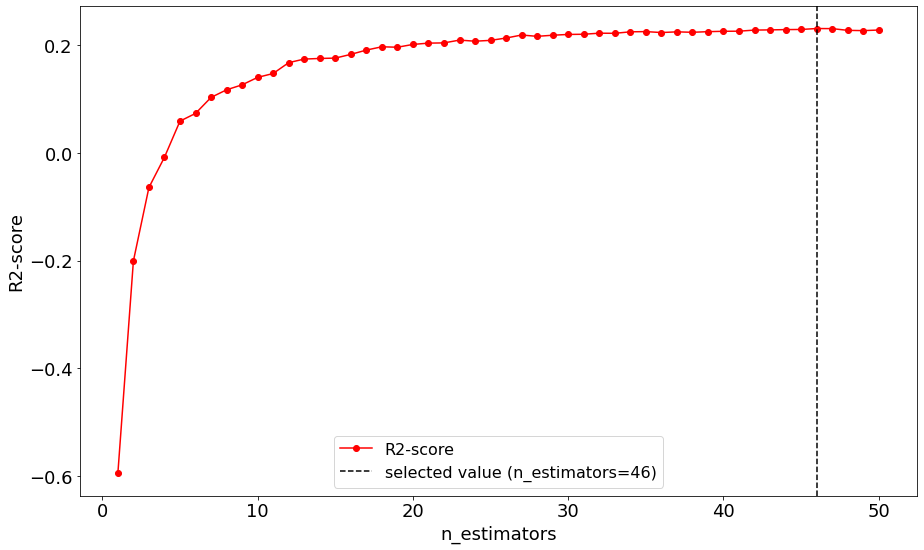

In [7]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_estimators': selected_hyperparams['n_estimators'],'max_features': selected_hyperparams['max_features'], 
                         'random_state': RAND_SEED, 'n_jobs': -1}

showEvalutationGraph_regression(RandomForestRegressor, weather_daily_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [8]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.174, mae=6.504, rmse=15.7149


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [9]:
# select features from the train dataset
weather_daily_fs_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_daily_fs_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))
dropping Solar Radiation (cal/cm^2/day) from (Solar Radiation (cal/cm^2/day), Sunshine (hour/day))


In [10]:
# Random Forest Model
model = RandomForestRegressor(random_state=RAND_SEED, n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_daily_fs_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'max_features': 'sqrt', 'n_estimators': 47}
Train set performance: r2-score=0.2588, mae=6.1237, rmse=12.8244


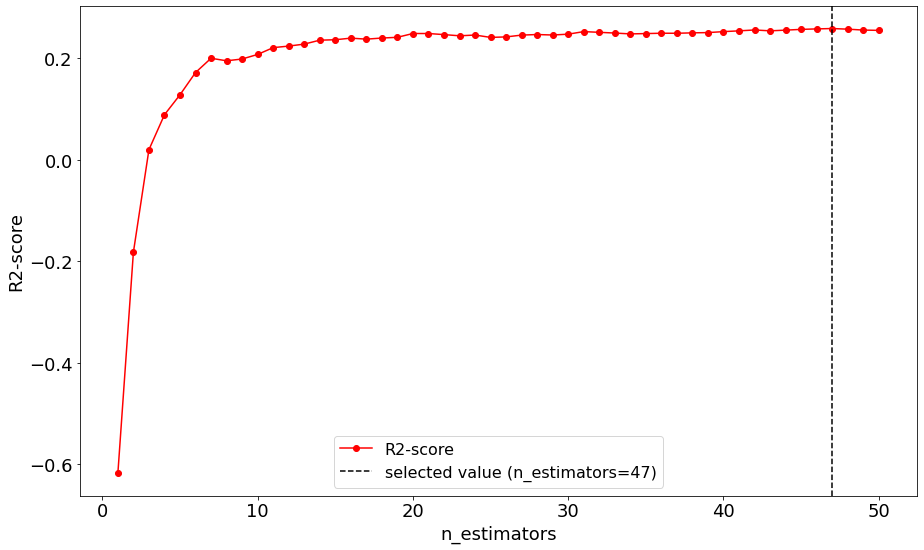

In [11]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_estimators': selected_hyperparams['n_estimators'],'max_features': selected_hyperparams['max_features'], 
                         'random_state': RAND_SEED, 'n_jobs': -1}

showEvalutationGraph_regression(RandomForestRegressor, weather_daily_fs_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [12]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.198, mae=6.3145, rmse=15.4851


## 2. Experimentation on the Weather Weekly dataset

In [13]:
# Load the train dataset
weather_weekly_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_avg_train_regression.csv')

# Load the test set
weather_weekly_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_avg_test_regression.csv')

In [14]:
# Random Forest Model
model = RandomForestRegressor(random_state=RAND_SEED, n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_weekly_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'max_features': 'sqrt', 'n_estimators': 50}
Train set performance: r2-score=0.049, mae=7.936, rmse=15.2412


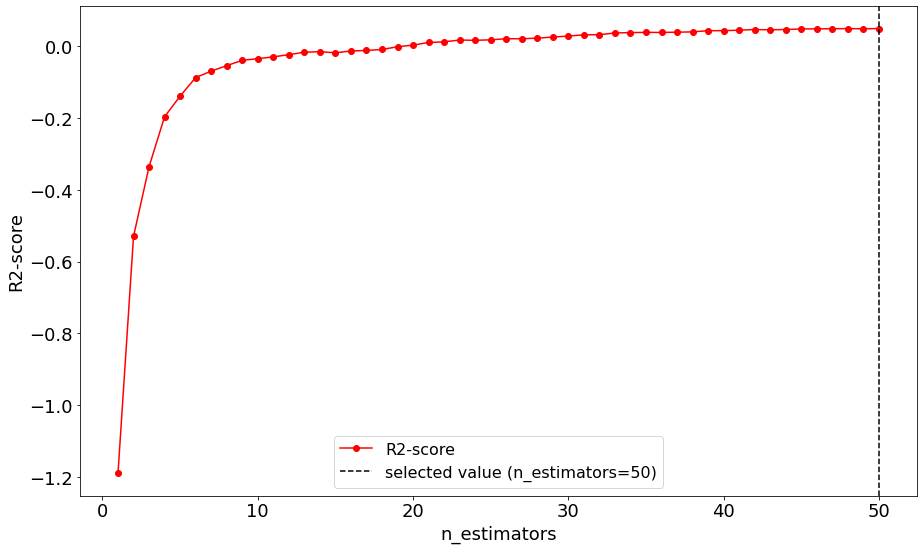

In [15]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_estimators': selected_hyperparams['n_estimators'],'max_features': selected_hyperparams['max_features'], 
                         'random_state': RAND_SEED, 'n_jobs': -1}

showEvalutationGraph_regression(RandomForestRegressor, weather_weekly_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [16]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_weekly_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.0406, mae=7.3809, rmse=14.7613


### 2.1 Apply Pearson Feature Selection to Weekly Weather Dataset

In [17]:
# select features from the train dataset
weather_weekly_fs_train_df, cols_to_drop = pearson_correlation_fs(weather_weekly_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_weekly_fs_test_df = weather_weekly_test_df.drop(columns=cols_to_drop)

dropping Avg Max Temp. (degree Celcius) from (Avg Max Temp. (degree Celcius), Avg Min Temp. (degree Celcius))
dropping Avg Cloudy (hour/day) from (Avg Cloudy (hour/day), Avg Relative Humidity (afternoon, %))
dropping Avg Sunshine (hour/day) from (Avg Cloudy (hour/day), Avg Sunshine (hour/day))
dropping Avg Sunshine (hour/day) from (Avg Solar Radiation (cal/cm^2/day), Avg Sunshine (hour/day))


In [18]:
# Random Forest Model
model = RandomForestRegressor(random_state=RAND_SEED, n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_weekly_fs_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'max_features': 'sqrt', 'n_estimators': 50}
Train set performance: r2-score=0.0517, mae=7.8898, rmse=15.2011


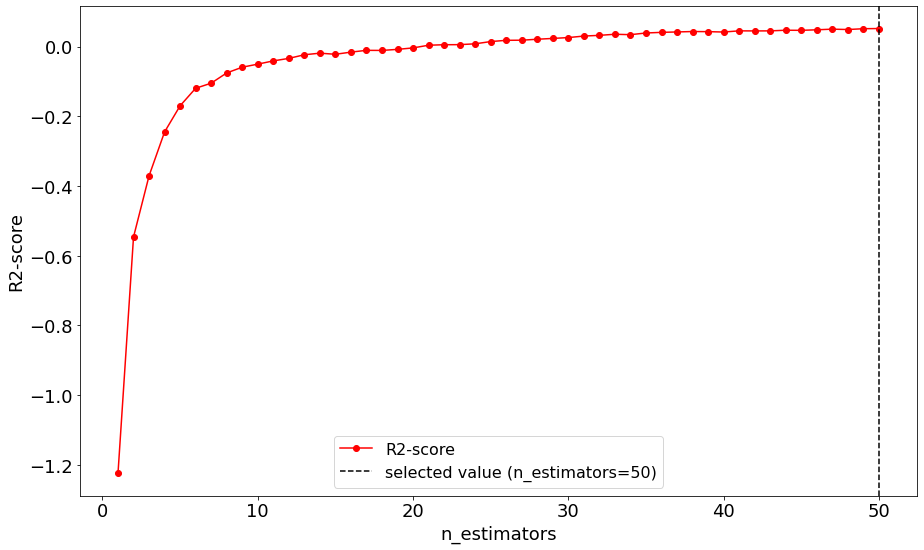

In [19]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_estimators': selected_hyperparams['n_estimators'],'max_features': selected_hyperparams['max_features'], 
                         'random_state': RAND_SEED, 'n_jobs': -1}

showEvalutationGraph_regression(RandomForestRegressor, weather_weekly_fs_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_estimators', x_axis_param_vals=n_estimators, 
                                selected_model_params=selected_model_params)

In [20]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_weekly_fs_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=-0.0007, mae=7.5422, rmse=15.075
